About this file

Add Suggestion
The autos.csv file contains information about used cars, including seller type, vehicle type, year of registration, and other features, to help analyze used car prices

1. dateCrawled: Date the car was crawled. (Date)
2. name: Name of the car. (String)
3. seller: Type of seller (private or dealer). (String)
4. offerType: Type of offer (e.g. sale, repair, etc.). (String)
5. price: Price of the car. (Integer)
6. abtest: Test type (A or B). (String)
7. vehicleType: Type of vehicle (e.g. SUV, sedan, etc.). (String)
8. yearOfRegistration: Year the car was registered. (Integer)
9. gearbox: Type of gearbox (manual or automatic). (String)
10. powerPS: Power of the car in PS. (Integer)
11. model: Model of the car. (String)
12. kilometer: Kilometers the car has been driven. (Integer)
13. monthOfRegistration: Month the car was registered. (Integer)
14. fuelType: Type of fuel (e.g. diesel, petrol, etc.). (String)
15. brand: Brand of the car. (String)
16. notRepairedDamage: Whether or not the car has any damage that has not been repaired. (String)
17. dateCreated: Date the car was created. (Date)
18. nrOfPictures: Number of pictures of the car. (Integer)
19. postalCode: Postal code of the car. (Integer)
20. lastSeen: Date the car was last seen. (Date)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('autos.csv')

In [3]:
df = dataset.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [5]:
df.isnull().sum()

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

First we will deal with the null values

In [6]:
df['vehicleType'].unique()

array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere'], dtype=object)

In [7]:
df['gearbox'].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [8]:
df['model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'andere', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       'glk', '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane',
       'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba', 'colt',
       'impreza', 'vectra', 'berlingo', 'm_klasse', 'tiguan', 'i_reihe',
       'espace', 'sharan', '6_reihe', 'panda', 'up', 'seicento', 'ceed',
       '5_reihe', 'yeti', 'octavia', 'mii', 'rx_reihe', '

In [9]:
df['fuelType'].unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [10]:
df['notRepairedDamage'].unique()

array([nan, 'ja', 'nein'], dtype=object)

In [11]:
brand_model_mapping = df.groupby('brand')['model'].unique()

In [12]:
print(brand_model_mapping)

brand
alfa_romeo                [156, 147, nan, spider, 159, andere, 145]
audi              [nan, a8, a4, a1, tt, a6, 80, 100, a3, a2, a5,...
bmw               [3er, 5er, 1er, andere, 7er, z_reihe, nan, 6er...
chevrolet                [andere, matiz, nan, spark, captiva, aveo]
chrysler          [andere, ptcruiser, crossfire, 300c, grand, vo...
citroen                 [c4, berlingo, c1, andere, c3, c5, nan, c2]
dacia                  [logan, duster, sandero, lodgy, nan, andere]
daewoo                   [lanos, kalos, matiz, andere, nubira, nan]
daihatsu          [cuore, sirion, andere, charade, move, nan, te...
fiat              [punto, nan, andere, panda, seicento, 500, sti...
ford              [c_max, ka, fiesta, escort, focus, mustang, mo...
honda                  [civic, andere, jazz, accord, cr_reihe, nan]
hyundai                 [andere, getz, i_reihe, santa, nan, tucson]
jaguar                                [andere, x_type, s_type, nan]
jeep                       [grand, wrangle

In [13]:
model_brand_mapping = df.groupby('model')['brand'].unique()

In [14]:
print(model_brand_mapping)

model
100              [audi]
145        [alfa_romeo]
147        [alfa_romeo]
156        [alfa_romeo]
159        [alfa_romeo]
               ...     
yaris          [toyota]
yeti            [skoda]
ypsilon        [lancia]
z_reihe           [bmw]
zafira           [opel]
Name: brand, Length: 251, dtype: object


In [15]:
vehicleType_model_mapping = df.groupby('vehicleType')['model'].unique()

In [16]:
vehicleType_model_mapping

vehicleType
andere        [kadett, andere, vito, golf, nan, combo, zafir...
bus           [c_max, a_klasse, transporter, andere, b_klass...
cabrio        [2_reihe, 1er, fortwo, 3er, escort, astra, 80,...
coupe         [nan, scirocco, andere, 3er, astra, tt, mustan...
kleinwagen    [golf, fabia, ka, twingo, arosa, punto, fortwo...
kombi         [passat, 5er, signum, astra, c_klasse, 156, fo...
limousine     [3er, andere, 3_reihe, 5er, civic, e_klasse, g...
suv           [grand, navara, nan, andere, xc_reihe, glk, so...
Name: model, dtype: object

In [17]:
model_vehicleType_mapping = df.groupby('model')['vehicleType'].unique()

In [18]:
model_vehicleType_mapping

model
100                   [nan, kombi, limousine, coupe, cabrio]
145              [nan, kleinwagen, limousine, coupe, andere]
147        [limousine, kleinwagen, nan, kombi, coupe, suv...
156        [kombi, limousine, nan, coupe, andere, kleinwa...
159                                  [limousine, kombi, nan]
                                 ...                        
yaris       [kleinwagen, nan, bus, andere, kombi, limousine]
yeti                               [suv, nan, andere, kombi]
ypsilon                            [kleinwagen, nan, cabrio]
z_reihe                      [cabrio, coupe, nan, limousine]
zafira     [nan, bus, andere, kombi, kleinwagen, suv, lim...
Name: vehicleType, Length: 251, dtype: object

In [19]:
fuelType_model_mapping = df.groupby('fuelType')['model'].unique()

In [20]:
fuelType_model_mapping

fuelType
andere     [focus, c1, andere, nan, 601, e_klasse, transp...
benzin     [golf, 3er, 2_reihe, andere, c_max, 3_reihe, p...
cng        [zafira, caddy, insignia, andere, up, combo, g...
diesel     [nan, grand, fabia, passat, navara, c_max, 5er...
elektro    [c5, andere, c_klasse, golf, nan, kaefer, a4, ...
hybrid     [andere, 5_reihe, auris, civic, cr_reihe, yari...
lpg        [meriva, 5er, octavia, golf, m_klasse, andere,...
Name: model, dtype: object

In [21]:
model_fuelType_mapping = df.groupby('model')['fuelType'].unique()

In [22]:
model_fuelType_mapping

model
100                     [benzin, diesel, nan, lpg]
145                          [benzin, nan, diesel]
147                     [diesel, benzin, nan, lpg]
156                     [benzin, lpg, diesel, nan]
159                          [nan, diesel, benzin]
                            ...                   
yaris                [benzin, nan, diesel, hybrid]
yeti                         [benzin, diesel, nan]
ypsilon                 [benzin, nan, diesel, lpg]
z_reihe                 [benzin, nan, lpg, diesel]
zafira     [diesel, benzin, cng, nan, lpg, hybrid]
Name: fuelType, Length: 251, dtype: object

In [23]:
fuelType_vehicleType_mapping = df.groupby('fuelType')['vehicleType'].unique()

In [24]:
fuelType_vehicleType_mapping

fuelType
andere     [limousine, nan, andere, kleinwagen, kombi, bu...
benzin     [nan, kleinwagen, limousine, cabrio, bus, komb...
cng        [bus, kombi, nan, limousine, kleinwagen, ander...
diesel     [coupe, suv, kleinwagen, kombi, bus, limousine...
elektro    [limousine, kleinwagen, coupe, nan, andere, ko...
hybrid     [limousine, kombi, coupe, kleinwagen, suv, nan...
lpg        [bus, limousine, kombi, suv, cabrio, coupe, kl...
Name: vehicleType, dtype: object

In [25]:
vehicleType_fuelType_mapping = df.groupby('vehicleType')['fuelType'].unique()

In [26]:
vehicleType_fuelType_mapping

vehicleType
andere        [nan, diesel, benzin, andere, lpg, cng, elektr...
bus           [benzin, diesel, nan, lpg, cng, andere, hybrid...
cabrio         [benzin, nan, diesel, lpg, cng, andere, elektro]
coupe         [diesel, benzin, nan, lpg, elektro, hybrid, cn...
kleinwagen    [benzin, diesel, nan, lpg, cng, andere, elektr...
kombi         [diesel, benzin, nan, lpg, cng, hybrid, andere...
limousine     [benzin, diesel, nan, lpg, andere, hybrid, ele...
suv           [diesel, nan, benzin, lpg, andere, hybrid, cng...
Name: fuelType, dtype: object

In [27]:
fuelType_model_mapping = df.groupby('model')['fuelType'].unique()

In [28]:
fuelType_model_mapping

model
100                     [benzin, diesel, nan, lpg]
145                          [benzin, nan, diesel]
147                     [diesel, benzin, nan, lpg]
156                     [benzin, lpg, diesel, nan]
159                          [nan, diesel, benzin]
                            ...                   
yaris                [benzin, nan, diesel, hybrid]
yeti                         [benzin, diesel, nan]
ypsilon                 [benzin, nan, diesel, lpg]
z_reihe                 [benzin, nan, lpg, diesel]
zafira     [diesel, benzin, cng, nan, lpg, hybrid]
Name: fuelType, Length: 251, dtype: object

In [29]:
df

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,...,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,...,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,...,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,...,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [30]:
np.size(df.dropna())

5480076

In [31]:
df2 = df.copy()

In [32]:
df2 = df2.dropna()

In [33]:
df2 = df2.drop(['seller', 'name', 'index', 'offerType'], axis = 1)

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260956 entries, 3 to 371527
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          260956 non-null  object
 1   price                260956 non-null  int64 
 2   abtest               260956 non-null  object
 3   vehicleType          260956 non-null  object
 4   yearOfRegistration   260956 non-null  int64 
 5   gearbox              260956 non-null  object
 6   powerPS              260956 non-null  int64 
 7   model                260956 non-null  object
 8   kilometer            260956 non-null  int64 
 9   monthOfRegistration  260956 non-null  int64 
 10  fuelType             260956 non-null  object
 11  brand                260956 non-null  object
 12  notRepairedDamage    260956 non-null  object
 13  dateCreated          260956 non-null  object
 14  nrOfPictures         260956 non-null  int64 
 15  postalCode           260956 non-null  i

In [35]:
df2 = df2[df2['price'] < 60000]

In [36]:
df2.isnull().sum()

dateCrawled            0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [37]:
df2 = df2.dropna()

<Axes: >

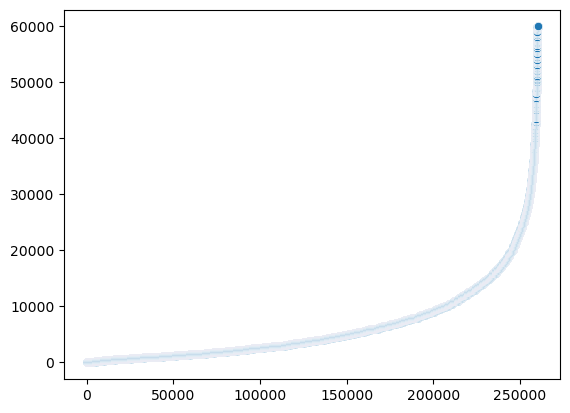

In [38]:
sns.scatterplot(np.sort(df2['price']))

In [39]:
np.sort(df2['yearOfRegistration'].unique())

array([1910, 1919, 1923, 1929, 1930, 1931, 1932, 1933, 1934, 1936, 1937,
       1938, 1939, 1941, 1942, 1943, 1945, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018], dtype=int64)

<Axes: >

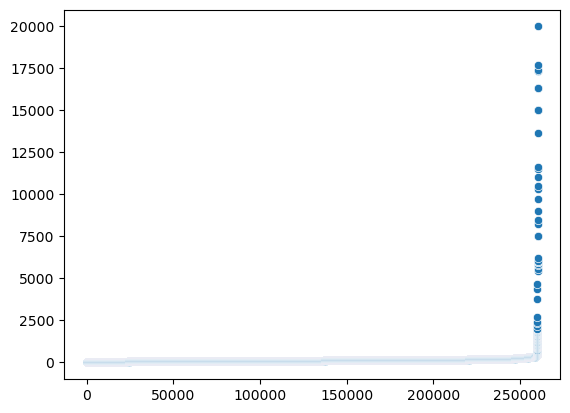

In [40]:
sns.scatterplot(np.sort(df2['powerPS']))

In [41]:
df2 = df2[df2['powerPS'] < 2500]

In [42]:
df2

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,2016-03-17 16:54:04,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,2016-03-19 19:53:49,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,2016-03-19 00:00:00,0,96465,2016-03-19 20:44:43
371521,2016-03-27 20:36:20,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27 00:00:00,0,26624,2016-03-29 10:17:23
371524,2016-03-05 19:56:21,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


In [43]:
df2 = df2.drop(['dateCreated', 'lastSeen'], axis = 1)

In [44]:
df2 = df2.drop('postalCode', axis = 1)

In [45]:
df2['dateCrawled'] = pd.to_datetime(df2['dateCrawled'])

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260178 entries, 3 to 371527
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          260178 non-null  datetime64[ns]
 1   price                260178 non-null  int64         
 2   abtest               260178 non-null  object        
 3   vehicleType          260178 non-null  object        
 4   yearOfRegistration   260178 non-null  int64         
 5   gearbox              260178 non-null  object        
 6   powerPS              260178 non-null  int64         
 7   model                260178 non-null  object        
 8   kilometer            260178 non-null  int64         
 9   monthOfRegistration  260178 non-null  int64         
 10  fuelType             260178 non-null  object        
 11  brand                260178 non-null  object        
 12  notRepairedDamage    260178 non-null  object        
 13  nrOfPictures       

In [47]:
df2['dateCrawled']

3        2016-03-17 16:54:04
4        2016-03-31 17:25:20
5        2016-04-04 17:36:23
6        2016-04-01 20:48:51
7        2016-03-21 18:54:38
                 ...        
371520   2016-03-19 19:53:49
371521   2016-03-27 20:36:20
371524   2016-03-05 19:56:21
371525   2016-03-19 18:57:12
371527   2016-03-07 19:39:19
Name: dateCrawled, Length: 260178, dtype: datetime64[ns]

In [48]:
# Extract year and convert to integer
df2['year_crawled'] = df2['dateCrawled'].dt.year.astype(int)

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260178 entries, 3 to 371527
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          260178 non-null  datetime64[ns]
 1   price                260178 non-null  int64         
 2   abtest               260178 non-null  object        
 3   vehicleType          260178 non-null  object        
 4   yearOfRegistration   260178 non-null  int64         
 5   gearbox              260178 non-null  object        
 6   powerPS              260178 non-null  int64         
 7   model                260178 non-null  object        
 8   kilometer            260178 non-null  int64         
 9   monthOfRegistration  260178 non-null  int64         
 10  fuelType             260178 non-null  object        
 11  brand                260178 non-null  object        
 12  notRepairedDamage    260178 non-null  object        
 13  nrOfPictures       

In [50]:
df2 = df2.drop(['monthOfRegistration', 'dateCrawled'], axis = 1)

In [51]:
Days_used = df2['year_crawled'] - df2['yearOfRegistration']

In [52]:
Days_used

3         15
4          8
5         21
6         12
7         36
          ..
371520    12
371521    16
371524    16
371525    20
371527     3
Length: 260178, dtype: int64

In [53]:
Days_used = pd.DataFrame(Days_used)

In [54]:
np.size(Days_used) 

260178

In [55]:
np.sort(df2['yearOfRegistration'].unique())

array([1910, 1919, 1923, 1929, 1930, 1931, 1932, 1933, 1934, 1936, 1937,
       1938, 1939, 1941, 1942, 1943, 1945, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018], dtype=int64)

# Here we define df3 and df4

In [56]:
# df2 = df2.insert(13, column = "daysUsed", Days_used, allow_duplicates = False)

In [57]:
df4 = pd.concat([df2, Days_used], axis =1)

In [58]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260178 entries, 3 to 371527
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               260178 non-null  int64 
 1   abtest              260178 non-null  object
 2   vehicleType         260178 non-null  object
 3   yearOfRegistration  260178 non-null  int64 
 4   gearbox             260178 non-null  object
 5   powerPS             260178 non-null  int64 
 6   model               260178 non-null  object
 7   kilometer           260178 non-null  int64 
 8   fuelType            260178 non-null  object
 9   brand               260178 non-null  object
 10  notRepairedDamage   260178 non-null  object
 11  nrOfPictures        260178 non-null  int64 
 12  year_crawled        260178 non-null  int32 
 13  0                   260178 non-null  int64 
dtypes: int32(1), int64(6), object(7)
memory usage: 28.8+ MB


In [59]:
df4

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,nrOfPictures,year_crawled,0
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,0,2016,15
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,0,2016,8
5,650,test,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja,0,2016,21
6,2200,test,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein,0,2016,12
7,0,test,limousine,1980,manuell,50,andere,40000,benzin,volkswagen,nein,0,2016,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,3200,control,limousine,2004,manuell,225,leon,150000,benzin,seat,ja,0,2016,12
371521,1150,control,bus,2000,manuell,0,zafira,150000,benzin,opel,nein,0,2016,16
371524,1199,test,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein,0,2016,16
371525,9200,test,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein,0,2016,20


In [60]:
df4 = df4.drop(['yearOfRegistration','nrOfPictures'], axis = 1)

In [61]:
df4

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,year_crawled,0
3,1500,test,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,nein,2016,15
4,3600,test,kleinwagen,manuell,69,fabia,90000,diesel,skoda,nein,2016,8
5,650,test,limousine,manuell,102,3er,150000,benzin,bmw,ja,2016,21
6,2200,test,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,nein,2016,12
7,0,test,limousine,manuell,50,andere,40000,benzin,volkswagen,nein,2016,36
...,...,...,...,...,...,...,...,...,...,...,...,...
371520,3200,control,limousine,manuell,225,leon,150000,benzin,seat,ja,2016,12
371521,1150,control,bus,manuell,0,zafira,150000,benzin,opel,nein,2016,16
371524,1199,test,cabrio,automatik,101,fortwo,125000,benzin,smart,nein,2016,16
371525,9200,test,bus,manuell,102,transporter,150000,diesel,volkswagen,nein,2016,20


In [62]:
df4 = df4.drop('year_crawled', axis =1)

# Removing the outlier of price

In [63]:
def remove_outlier(df, feature):
    Q1 = np.quantile(df[feature], 0.25)
    Q3 = np.quantile(df[feature], 0.75)
    
    IQR = Q3 - Q1
    
    lowerbound = Q1 - 1.5 * IQR
    upperbound = Q3 + 1.5 * IQR
    
    dfd = df[(df[feature] >= lowerbound) &(df[feature] <= upperbound)]
    
    return dfd

# df5 is defined to remove the outlier of df4['price']

In [64]:
df5 = remove_outlier(df4,'price')

<Axes: xlabel='price'>

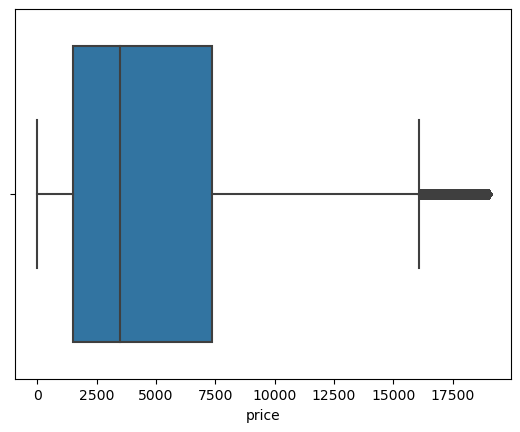

In [65]:
sns.boxplot(x = df5['price'])

<Axes: xlabel='price'>

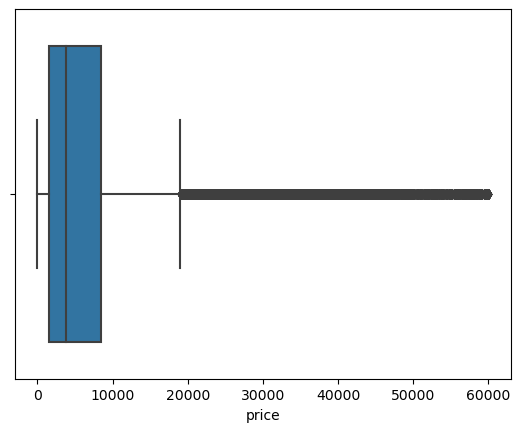

In [66]:
sns.boxplot(x = df4['price'])

In [67]:
df5

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,0
3,1500,test,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,nein,15
4,3600,test,kleinwagen,manuell,69,fabia,90000,diesel,skoda,nein,8
5,650,test,limousine,manuell,102,3er,150000,benzin,bmw,ja,21
6,2200,test,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,nein,12
7,0,test,limousine,manuell,50,andere,40000,benzin,volkswagen,nein,36
...,...,...,...,...,...,...,...,...,...,...,...
371518,3999,test,kombi,manuell,3,3er,150000,diesel,bmw,nein,11
371520,3200,control,limousine,manuell,225,leon,150000,benzin,seat,ja,12
371521,1150,control,bus,manuell,0,zafira,150000,benzin,opel,nein,16
371524,1199,test,cabrio,automatik,101,fortwo,125000,benzin,smart,nein,16


In [68]:
df4.describe()

,price,powerPS,kilometer,0
count,260178.000000,260178.000000,260178.00000,260178.000000
mean,6442.380363,124.387700,124259.92974,12.690400
std,7374.107379,70.334165,39653.07441,6.468965
min,0.000000,0.000000,5000.00000,-2.000000
25%,1500.000000,77.000000,100000.00000,8.000000
50%,3800.000000,116.000000,150000.00000,12.000000
75%,8500.000000,150.000000,150000.00000,17.000000
max,59999.000000,2402.000000,150000.00000,106.000000


In [69]:
df5.describe()

,price,powerPS,kilometer,0
count,243651.000000,243651.000000,243651.000000,243651.000000
mean,4997.261600,118.039282,127668.304255,13.137644
std,4534.690822,64.268828,36769.866108,6.129721
min,0.000000,0.000000,5000.000000,-2.000000
25%,1490.000000,75.000000,125000.000000,9.000000
50%,3490.000000,110.000000,150000.000000,13.000000
75%,7350.000000,150.000000,150000.000000,17.000000
max,19000.000000,2402.000000,150000.000000,106.000000


## There is change in the mean , count, std, etc. of price, powerPS, kilometer, 0 i.e daysUsed

# Calculating the pearson corelation for numeric variable
-> person corelation matrix gives us the ralation between 2 variables

In [70]:
df5.columns

Index([            'price',            'abtest',       'vehicleType',
                 'gearbox',           'powerPS',             'model',
               'kilometer',          'fuelType',             'brand',
       'notRepairedDamage',                   0],
      dtype='object')

In [71]:
df5 = df5.rename(columns={0: 'daysUsed'})


In [72]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243651 entries, 3 to 371525
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              243651 non-null  int64 
 1   abtest             243651 non-null  object
 2   vehicleType        243651 non-null  object
 3   gearbox            243651 non-null  object
 4   powerPS            243651 non-null  int64 
 5   model              243651 non-null  object
 6   kilometer          243651 non-null  int64 
 7   fuelType           243651 non-null  object
 8   brand              243651 non-null  object
 9   notRepairedDamage  243651 non-null  object
 10  daysUsed           243651 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 22.3+ MB


In [73]:
# Calculate Pearson correlation for the numeric variables
numeric_variables = ['price', 'powerPS', 'kilometer', 'daysUsed']
numeric_correlation = df5[numeric_variables].corr()['price'].sort_values(ascending=False)

print("Correlation with Numeric Variables (Pearson Correlation):")
print(numeric_correlation)


Correlation with Numeric Variables (Pearson Correlation):
price        1.000000
powerPS      0.426672
kilometer   -0.388367
daysUsed    -0.555508
Name: price, dtype: float64


# Calculating cramers_v corelation for categorical variable

In [74]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    
    if kcorr > 1 and rcorr > 1:
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    elif kcorr == 1:
        return np.sqrt(phi2corr)
    elif rcorr == 1:
        return 1.0
    else:
        return np.nan

# Calculate Cramer's V for the categorical variables against 'price'
categorical_variables = ['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']

cramer_with_price = {}
for var in categorical_variables:
    cramer_with_price[var] = cramers_v(df5[var], df5['price'])

cramer_with_price_series = pd.Series(cramer_with_price, name='price').sort_values(ascending=False)

print("\nCorrelation with Categorical Variables (Cramer's V) against 'price':")
print(cramer_with_price_series)



Correlation with Categorical Variables (Cramer's V) against 'price':
notRepairedDamage    0.377200
gearbox              0.251636
vehicleType          0.146344
fuelType             0.140475
brand                0.079842
model                0.070595
abtest               0.014472
Name: price, dtype: float64


## Finding and removing outliers of kilometer

<Axes: xlabel='kilometer'>

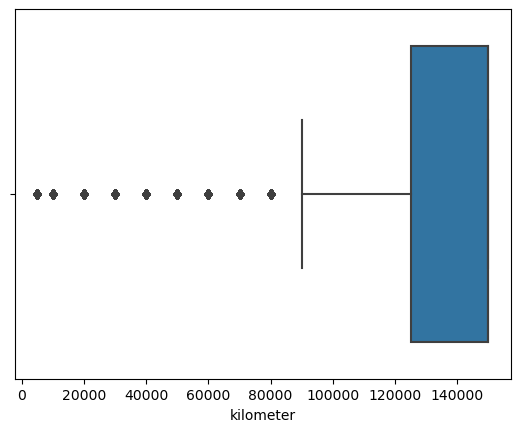

In [75]:
sns.boxplot(x = df5['kilometer'])

### It may be possible that a person drive a car and keep it for longtime because there is no person who can drive so there is no outlier in it

# Performing feature hashing encoding on the dataframe df6

In [76]:
df6 = df5.copy()

In [77]:
df6

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,daysUsed
3,1500,test,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,nein,15
4,3600,test,kleinwagen,manuell,69,fabia,90000,diesel,skoda,nein,8
5,650,test,limousine,manuell,102,3er,150000,benzin,bmw,ja,21
6,2200,test,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,nein,12
7,0,test,limousine,manuell,50,andere,40000,benzin,volkswagen,nein,36
...,...,...,...,...,...,...,...,...,...,...,...
371518,3999,test,kombi,manuell,3,3er,150000,diesel,bmw,nein,11
371520,3200,control,limousine,manuell,225,leon,150000,benzin,seat,ja,12
371521,1150,control,bus,manuell,0,zafira,150000,benzin,opel,nein,16
371524,1199,test,cabrio,automatik,101,fortwo,125000,benzin,smart,nein,16


In [78]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243651 entries, 3 to 371525
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              243651 non-null  int64 
 1   abtest             243651 non-null  object
 2   vehicleType        243651 non-null  object
 3   gearbox            243651 non-null  object
 4   powerPS            243651 non-null  int64 
 5   model              243651 non-null  object
 6   kilometer          243651 non-null  int64 
 7   fuelType           243651 non-null  object
 8   brand              243651 non-null  object
 9   notRepairedDamage  243651 non-null  object
 10  daysUsed           243651 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 22.3+ MB


In [79]:
df6.isnull().sum()

price                0
abtest               0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
daysUsed             0
dtype: int64

In [80]:
import pandas as pd
from category_encoders import TargetEncoder

# Assuming 'data' is your DataFrame
data = df6.copy()  # Make a copy to avoid modifying the original DataFrame

# Define the categorical columns to encode
columns_to_encode = ['gearbox', 'vehicleType', 'fuelType', 'abtest', 'model', 'brand', 'notRepairedDamage']

# Initialize TargetEncoder
encoder = TargetEncoder(cols=columns_to_encode)

# Fit and transform the data
encoded_data = encoder.fit_transform(data, data['price'])

# Print first few rows to verify
print(encoded_data.head())


   price       abtest  vehicleType      gearbox  powerPS        model  \
3   1500  4992.306126  3028.705315  4445.728432       75  4760.325356   
4   3600  4992.306126  3028.705315  4445.728432       69  4400.649061   
5    650  4992.306126  5004.306962  4445.728432      102  5423.404362   
6   2200  4992.306126  7044.368149  4445.728432      109  3430.180251   
7      0  4992.306126  5004.306962  4445.728432       50  4778.141647   

   kilometer     fuelType        brand  notRepairedDamage  daysUsed  
3     150000  4102.272966  5055.425758        5371.476445        15  
4      90000  6898.230783  6333.934827        5371.476445         8  
5     150000  4102.272966  6717.124595        2088.982972        21  
6     150000  4102.272966  3552.426580        5371.476445        12  
7      40000  4102.272966  5055.425758        5371.476445        36  


In [81]:
encoded_data.isnull().sum()

price                0
abtest               0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
daysUsed             0
dtype: int64

In [82]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243651 entries, 3 to 371525
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              243651 non-null  int64  
 1   abtest             243651 non-null  float64
 2   vehicleType        243651 non-null  float64
 3   gearbox            243651 non-null  float64
 4   powerPS            243651 non-null  int64  
 5   model              243651 non-null  float64
 6   kilometer          243651 non-null  int64  
 7   fuelType           243651 non-null  float64
 8   brand              243651 non-null  float64
 9   notRepairedDamage  243651 non-null  float64
 10  daysUsed           243651 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 22.3 MB


In [83]:
df7 = encoded_data

In [84]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243651 entries, 3 to 371525
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              243651 non-null  int64  
 1   abtest             243651 non-null  float64
 2   vehicleType        243651 non-null  float64
 3   gearbox            243651 non-null  float64
 4   powerPS            243651 non-null  int64  
 5   model              243651 non-null  float64
 6   kilometer          243651 non-null  int64  
 7   fuelType           243651 non-null  float64
 8   brand              243651 non-null  float64
 9   notRepairedDamage  243651 non-null  float64
 10  daysUsed           243651 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 22.3 MB


In [85]:
df7

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,daysUsed
3,1500,4992.306126,3028.705315,4445.728432,75,4760.325356,150000,4102.272966,5055.425758,5371.476445,15
4,3600,4992.306126,3028.705315,4445.728432,69,4400.649061,90000,6898.230783,6333.934827,5371.476445,8
5,650,4992.306126,5004.306962,4445.728432,102,5423.404362,150000,4102.272966,6717.124595,2088.982972,21
6,2200,4992.306126,7044.368149,4445.728432,109,3430.180251,150000,4102.272966,3552.426580,5371.476445,12
7,0,4992.306126,5004.306962,4445.728432,50,4778.141647,40000,4102.272966,5055.425758,5371.476445,36
...,...,...,...,...,...,...,...,...,...,...,...
371518,3999,4992.306126,5276.676505,4445.728432,3,5423.404362,150000,6898.230783,6717.124595,5371.476445,11
371520,3200,5002.615439,5004.306962,4445.728432,225,7276.080722,150000,4102.272966,4573.166803,2088.982972,12
371521,1150,5002.615439,5688.618704,4445.728432,0,4024.060773,150000,4102.272966,3209.417065,5371.476445,16
371524,1199,4992.306126,7044.368149,7135.458578,101,3982.524619,125000,4102.272966,3924.496712,5371.476445,16


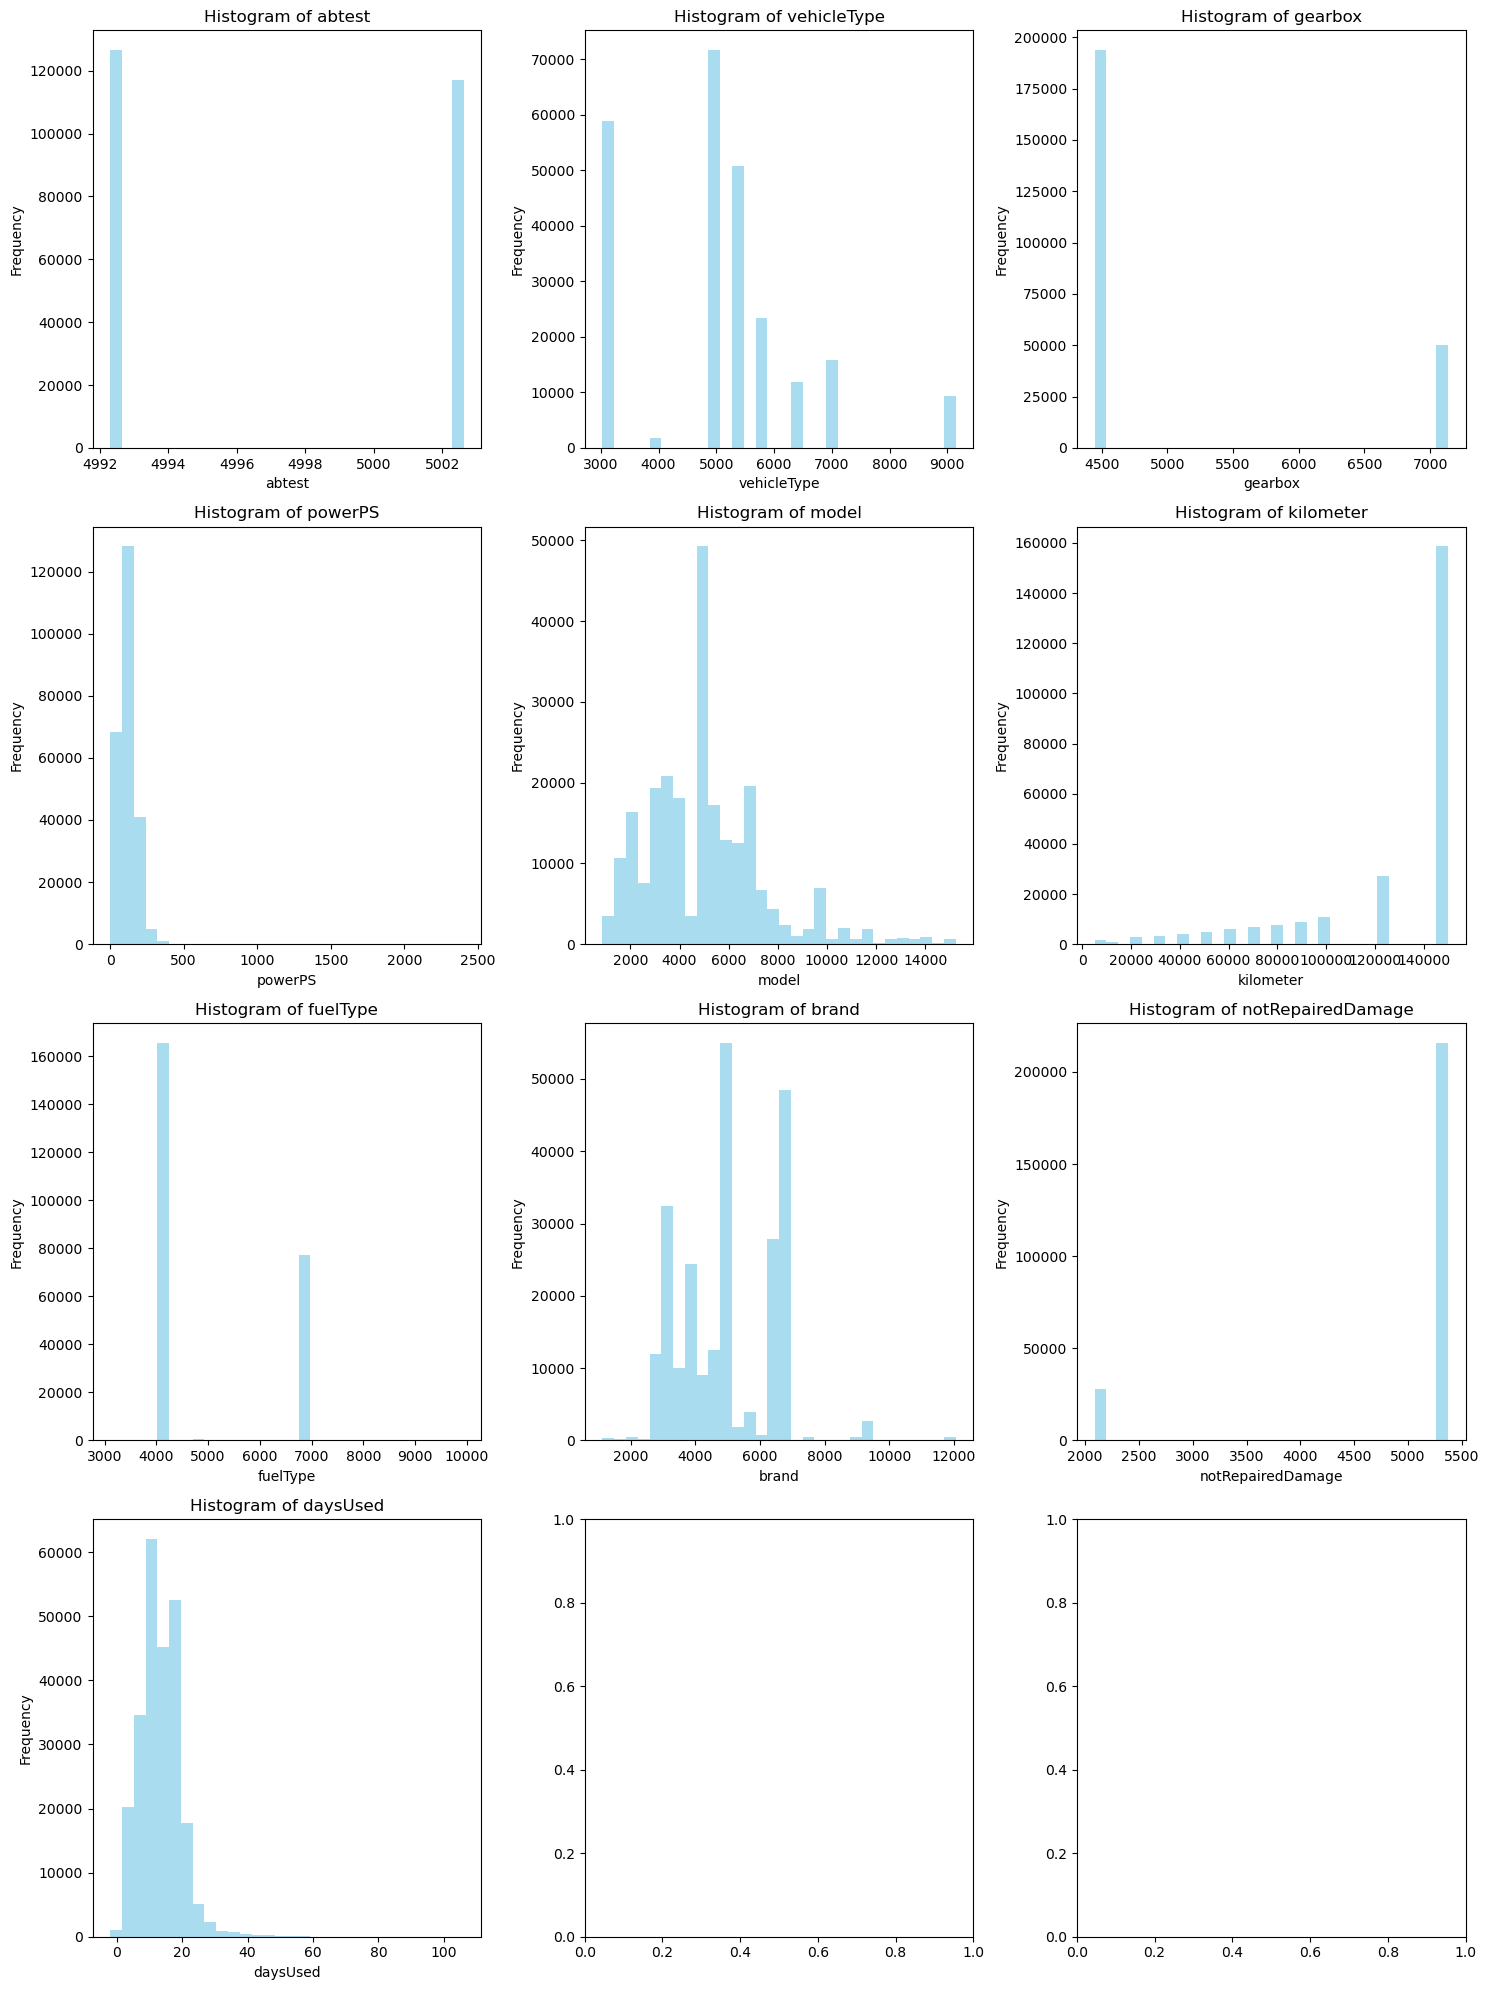

()

In [86]:
import matplotlib.pyplot as plt

def plot_histograms(data):
    # Exclude 'price' column
    features = [col for col in data.columns if col != 'price']

    # Calculate the number of rows and columns for subplots
    num_plots = len(features)
    num_cols = 3  # Number of plots per row
    num_rows = -(-num_plots // num_cols)  # Ceiling division to get number of rows

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    # Flatten axes to handle varying numbers of plots
    axes = axes.flatten()

    # Plot each feature's histogram
    for i, feature in enumerate(features):
        ax = axes[i]
        ax.hist(data[feature], bins=30, color='skyblue', alpha=0.7)
        ax.set_title(f'Histogram of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'encoded_data' is your DataFrame with encoded features
plot_histograms(df7)
/

<Axes: xlabel='price'>

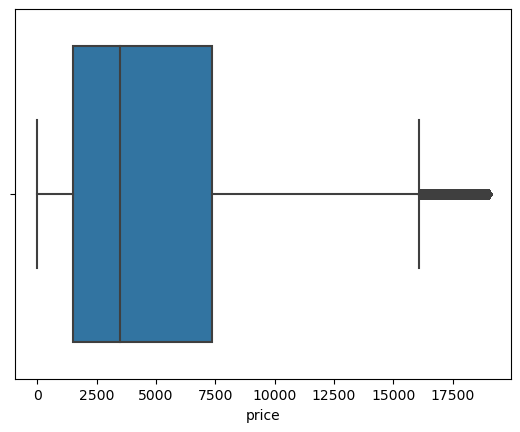

In [87]:
sns.boxplot(x = df7['price'])

<Axes: xlabel='price', ylabel='Count'>

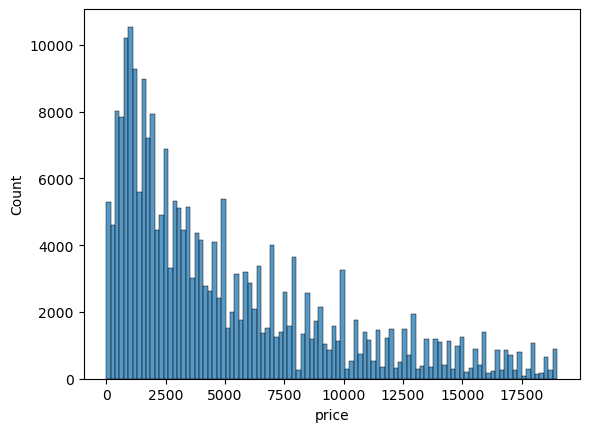

In [88]:
sns.histplot(df7['price'])

In [89]:
df7 = df7[df7['price'] > 100]

### Logically the price of the car can not be less than 100 by domain knowledge hence we remove that values

<Axes: xlabel='price', ylabel='Count'>

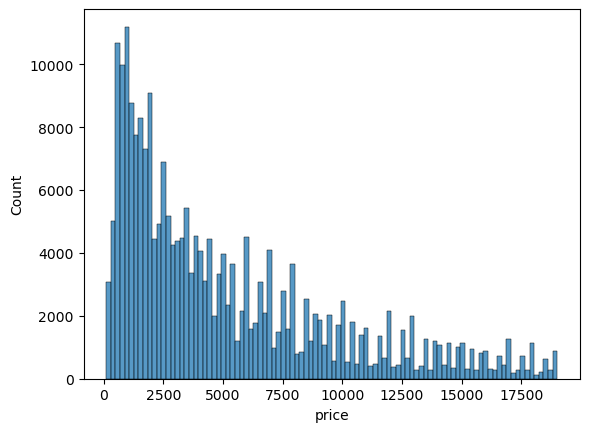

In [90]:
sns.histplot(df7['price'])

In [91]:
df7

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,daysUsed
3,1500,4992.306126,3028.705315,4445.728432,75,4760.325356,150000,4102.272966,5055.425758,5371.476445,15
4,3600,4992.306126,3028.705315,4445.728432,69,4400.649061,90000,6898.230783,6333.934827,5371.476445,8
5,650,4992.306126,5004.306962,4445.728432,102,5423.404362,150000,4102.272966,6717.124595,2088.982972,21
6,2200,4992.306126,7044.368149,4445.728432,109,3430.180251,150000,4102.272966,3552.426580,5371.476445,12
10,2000,5002.615439,5004.306962,4445.728432,105,3558.805155,150000,4102.272966,4148.886352,5371.476445,12
...,...,...,...,...,...,...,...,...,...,...,...
371518,3999,4992.306126,5276.676505,4445.728432,3,5423.404362,150000,6898.230783,6717.124595,5371.476445,11
371520,3200,5002.615439,5004.306962,4445.728432,225,7276.080722,150000,4102.272966,4573.166803,2088.982972,12
371521,1150,5002.615439,5688.618704,4445.728432,0,4024.060773,150000,4102.272966,3209.417065,5371.476445,16
371524,1199,4992.306126,7044.368149,7135.458578,101,3982.524619,125000,4102.272966,3924.496712,5371.476445,16


In [92]:
from sklearn.preprocessing import StandardScaler

def standardize_dataframe_except_price(df):
    # Select only numeric columns excluding 'price'
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    numeric_cols.remove('price')  # Remove 'price' column

    # Initialize StandardScaler
    scaler = StandardScaler()

    # Standardize numeric columns excluding 'price'
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    return df

# Example usage:
# Assuming 'encoded_data' is your DataFrame with encoded features
# 'encoded_data' should contain only numeric columns (after encoding and dropping categorical columns)
standardized_data_except_price = standardize_dataframe_except_price(df7.copy())

In [93]:
standardized_data_except_price.head()

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,daysUsed
3,1500,-0.962484,-1.386033,-0.509039,-0.682403,-0.103711,0.610559,-0.687960,0.035931,0.349226,0.318067
4,3600,-0.962484,-1.386033,-0.509039,-0.776735,-0.253626,-1.022076,1.446558,0.898202,0.349226,-0.830880
5,650,-0.962484,0.001483,-0.509039,-0.257907,0.172664,0.610559,-0.687960,1.156638,-2.863473,1.302878
6,2200,-0.962484,1.434270,-0.509039,-0.147853,-0.658123,0.610559,-0.687960,-0.977743,0.349226,-0.174339
10,2000,1.038978,0.001483,-0.509039,-0.210741,-0.604512,0.610559,-0.687960,-0.575470,0.349226,-0.174339


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

# Load your DataFrame or use a sample DataFrame (replace this with your actual data)
# Here we create a sample DataFrame with random data
np.random.seed(42)
data = df7.copy()
df = pd.DataFrame(data)

# Separate features (X) and target variable (y)
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models and their corresponding hyperparameters
models = {
    "Random Forest": (RandomForestRegressor(), {
        'n_estimators': [8, 16, 32, 64, 128, 256]
    }),
    "Decision Tree": (DecisionTreeRegressor(), {
        'criterion': ['mse', 'friedman_mse', 'mae', 'poisson']
    }),
    "Gradient Boosting": (GradientBoostingRegressor(), {
        'learning_rate': [0.1, 0.01, 0.05, 0.001],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    }),
    "Linear Regression": (LinearRegression(), {}),
    "XGBRegressor": (XGBRegressor(), {
        'learning_rate': [0.1, 0.01, 0.05, 0.001],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    }),
    "CatBoosting Regressor": (CatBoostRegressor(verbose=False), {
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'iterations': [30, 50, 100]
    }),
    "AdaBoost Regressor": (AdaBoostRegressor(), {
        'learning_rate': [0.1, 0.01, 0.5, 0.001],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    }),
}

# Dictionary to store the best R-squared value for each model
best_r2_scores = {}

# Iterate over models
for name, (model, param_grid) in models.items():
    print(f"Training {name}...")
    
    # Initialize GridSearchCV with the model, parameters, and cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', verbose=0)
    
    # Fit the GridSearchCV on the training data
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its best parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Make predictions on the test data
    y_pred = best_model.predict(X_test)
    
    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    best_r2_scores[name] = r2
    
    print(f"{name} - Best R^2 Score: {r2:.4f} with Hyperparameters: {best_params}")

# Find the model with the best R-squared score
best_model_name = max(best_r2_scores, key=best_r2_scores.get)
best_r2 = best_r2_scores[best_model_name]

print("\n---------------------------------------------")
print(f"Best Model: {best_model_name}")
print(f"Best R^2 Score: {best_r2:.4f}")


Training Random Forest...


In [53]:
df3 = pd.concat([df2, Days_used], axis =1)

In [54]:
df3 = df3.rename(columns = {'0' : 'daysUsed'})

In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260178 entries, 3 to 371527
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   dateCrawled         260178 non-null  datetime64[ns] 
 1   price               260178 non-null  int64          
 2   abtest              260178 non-null  object         
 3   vehicleType         260178 non-null  object         
 4   yearOfRegistration  260178 non-null  datetime64[ns] 
 5   gearbox             260178 non-null  object         
 6   powerPS             260178 non-null  int64          
 7   model               260178 non-null  object         
 8   kilometer           260178 non-null  int64          
 9   fuelType            260178 non-null  object         
 10  brand               260178 non-null  object         
 11  notRepairedDamage   260178 non-null  object         
 12  nrOfPictures        260178 non-null  int64          
 13  0                  

In [56]:
df3 = df3.drop(['dateCrawled','yearOfRegistration'], axis =1)

In [57]:
import pandas as pd

def dummy_encode(df, columns):

  # Create dummy variables for each column
  encoded_df = pd.get_dummies(df[columns], drop_first=True) # drop_first = True drop the first column

  # Combine original and encoded columns
  return pd.concat([df.drop(columns, axis=1), encoded_df], axis=1)

In [58]:
columns_to_encode = ['abtest','vehicleType','gearbox', 'fuelType', 'notRepairedDamage']
df3 = dummy_encode(df3,columns_to_encode)

In [59]:
df3

,price,powerPS,model,kilometer,brand,nrOfPictures,0,abtest_test,vehicleType_bus,vehicleType_cabrio,...,vehicleType_limousine,vehicleType_suv,gearbox_manuell,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg,notRepairedDamage_nein
3,1500,75,golf,150000,volkswagen,0,16877 days 16:54:03.999997999,True,False,False,...,False,False,True,True,False,False,False,False,False,True
4,3600,69,fabia,90000,skoda,0,16891 days 17:25:19.999997992,True,False,False,...,False,False,True,False,False,True,False,False,False,True
5,650,102,3er,150000,bmw,0,16895 days 17:36:22.999998005,True,False,False,...,True,False,True,True,False,False,False,False,False,False
6,2200,109,2_reihe,150000,peugeot,0,16892 days 20:48:50.999997996,True,False,True,...,False,False,True,True,False,False,False,False,False,True
7,0,50,andere,40000,volkswagen,0,16881 days 18:54:37.999998020,True,False,False,...,True,False,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,3200,225,leon,150000,seat,0,16879 days 19:53:48.999997996,False,False,False,...,True,False,True,True,False,False,False,False,False,False
371521,1150,0,zafira,150000,opel,0,16887 days 20:36:19.999998,False,True,False,...,False,False,True,True,False,False,False,False,False,True
371524,1199,101,fortwo,125000,smart,0,16865 days 19:56:20.999998,True,False,True,...,False,False,False,True,False,False,False,False,False,True
371525,9200,102,transporter,150000,volkswagen,0,16879 days 18:57:11.999998004,True,True,False,...,False,False,True,False,False,True,False,False,False,True


In [60]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260178 entries, 3 to 371527
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   price                   260178 non-null  int64          
 1   powerPS                 260178 non-null  int64          
 2   model                   260178 non-null  object         
 3   kilometer               260178 non-null  int64          
 4   brand                   260178 non-null  object         
 5   nrOfPictures            260178 non-null  int64          
 6   0                       260178 non-null  timedelta64[ns]
 7   abtest_test             260178 non-null  bool           
 8   vehicleType_bus         260178 non-null  bool           
 9   vehicleType_cabrio      260178 non-null  bool           
 10  vehicleType_coupe       260178 non-null  bool           
 11  vehicleType_kleinwagen  260178 non-null  bool           
 12  vehicleType_kombi    

In [61]:
df3.columns

Index([                 'price',                'powerPS',
                        'model',              'kilometer',
                        'brand',           'nrOfPictures',
                              0,            'abtest_test',
              'vehicleType_bus',     'vehicleType_cabrio',
            'vehicleType_coupe', 'vehicleType_kleinwagen',
            'vehicleType_kombi',  'vehicleType_limousine',
              'vehicleType_suv',        'gearbox_manuell',
              'fuelType_benzin',           'fuelType_cng',
              'fuelType_diesel',       'fuelType_elektro',
              'fuelType_hybrid',           'fuelType_lpg',
       'notRepairedDamage_nein'],
      dtype='object')

In [62]:
def average_and_range_price_by_feature(feature_name, df):
    # Group the DataFrame by 'vehicleType' and calculate the average price for each group
    avg_price_by_type = df.groupby(feature_name)['price'].agg(['mean', 'min', 'max']).reset_index()
    
    # Rename the columns for clarity
    avg_price_by_type.columns = [feature_name, 'average_price','minimum','maximum']
    
    # Sort the results by average price in descending order
    avg_price_by_type = avg_price_by_type.sort_values(by='average_price', ascending=False)
    
    return avg_price_by_type

In [63]:
avg_and_range_prices_by_vehicleType = average_and_range_price_by_feature('vehicleType',df3)
print(avg_and_range_prices_by_vehicleType)

KeyError: 'vehicleType'

In [ ]:
def average_price_by_feature(feature_name, df):
    # Group the DataFrame by 'vehicleType' and calculate the average price for each group
    avg_price_by_type = df.groupby(feature_name)['price'].mean().reset_index()
    
    # Rename the columns for clarity
    avg_price_by_type.columns = [feature_name, 'average_price']
    
    # Sort the results by average price in descending order
    avg_price_by_type = avg_price_by_type.sort_values(by='average_price', ascending=False)
    
    return avg_price_by_type

In [ ]:
avg_price_by_vehicleType = average_price_by_feature('vehicleType', df3)
print(avg_price_by_vehicleType)

In [ ]:
avg_and_range_price_by_barnd = average_and_range_price_by_feature('brand', df3)
print(avg_and_range_price_by_barnd) 

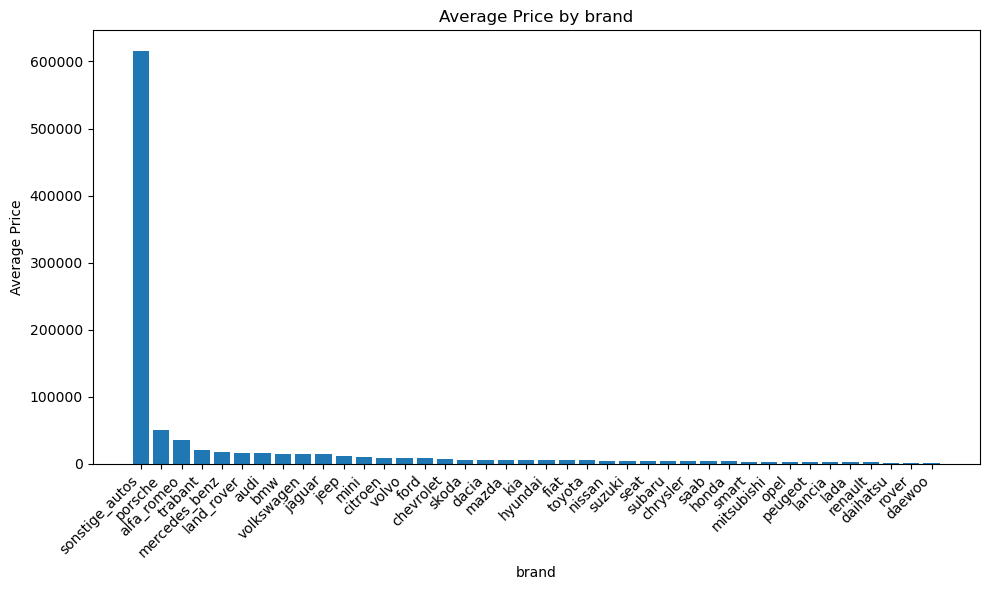

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

def average_price_by_feature(feature_name, df):
    # Group the DataFrame by the specified feature and calculate the average price for each group
    avg_price_by_feature = df.groupby(feature_name)['price'].mean().reset_index()
    
    # Rename the columns for clarity
    avg_price_by_feature.columns = [feature_name, 'average_price']
    
    # Sort the results by average price in descending order
    avg_price_by_feature = avg_price_by_feature.sort_values(by='average_price', ascending=False)
    
    return avg_price_by_feature

# Assuming 'df' is your DataFrame with columns 'vehicleType' and 'price'
avg_price_by_vehicleType = average_price_by_feature('brand', df)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_vehicleType['brand'], avg_price_by_vehicleType['average_price'])
plt.xlabel('brand')
plt.ylabel('Average Price')
plt.title('Average Price by brand')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<Axes: ylabel='price'>

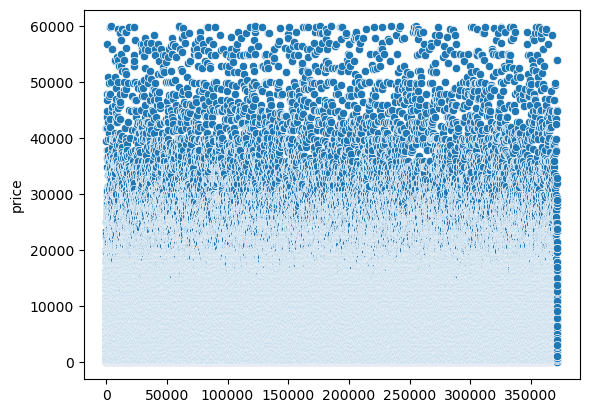

In [69]:
sns.scatterplot(df3['price'])

In [70]:
df.columns

Index(['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price',
       'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [71]:
df3.columns

Index([                 'price',                'powerPS',
                        'model',              'kilometer',
                        'brand',           'nrOfPictures',
                              0,            'abtest_test',
              'vehicleType_bus',     'vehicleType_cabrio',
            'vehicleType_coupe', 'vehicleType_kleinwagen',
            'vehicleType_kombi',  'vehicleType_limousine',
              'vehicleType_suv',        'gearbox_manuell',
              'fuelType_benzin',           'fuelType_cng',
              'fuelType_diesel',       'fuelType_elektro',
              'fuelType_hybrid',           'fuelType_lpg',
       'notRepairedDamage_nein'],
      dtype='object')

In [72]:
# df3 = df3.drop('nrOfPictures', axis = 1)
df3.columns

Index([                 'price',                'powerPS',
                        'model',              'kilometer',
                        'brand',           'nrOfPictures',
                              0,            'abtest_test',
              'vehicleType_bus',     'vehicleType_cabrio',
            'vehicleType_coupe', 'vehicleType_kleinwagen',
            'vehicleType_kombi',  'vehicleType_limousine',
              'vehicleType_suv',        'gearbox_manuell',
              'fuelType_benzin',           'fuelType_cng',
              'fuelType_diesel',       'fuelType_elektro',
              'fuelType_hybrid',           'fuelType_lpg',
       'notRepairedDamage_nein'],
      dtype='object')

## We find the range of price

In [73]:
df3['price'].agg(['min','max'])

min        0
max    59999
Name: price, dtype: int64

(array([167008.,  51606.,  22671.,   9484.,   5010.,   2054.,   1103.,
           614.,    345.,    283.]),
 array([    0. ,  5999.9, 11999.8, 17999.7, 23999.6, 29999.5, 35999.4,
        41999.3, 47999.2, 53999.1, 59999. ]),
 <BarContainer object of 10 artists>)

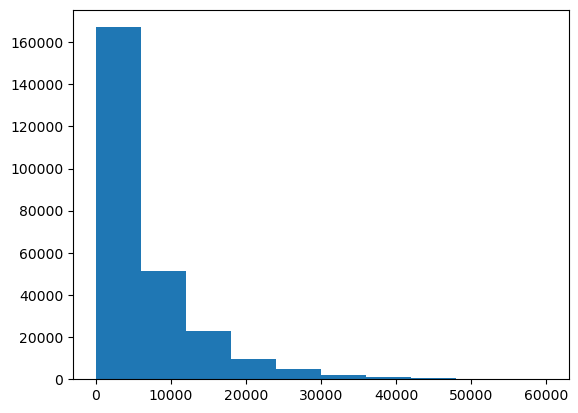

In [74]:
plt.hist(df3['price'])

<Axes: xlabel='price'>

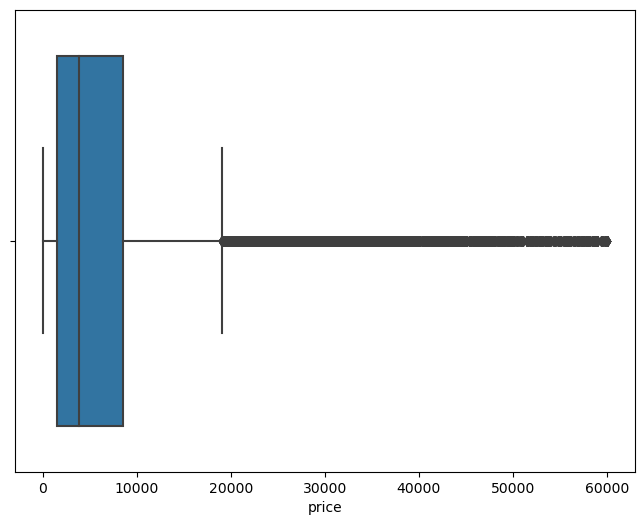

In [75]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df3['price'])


In [79]:
def remove_outliers(df, feature):
    Q1 = np.quantile(df[feature],0.25)
    Q3 = np.quantile(df[feature],0.75)
    
    IQR = Q3 - Q1
    
    lowerbound = Q1 - 1.5 * IQR
    upperbound = Q3 + 1.5 * IQR
    df_d = df[(df[feature]>=lowerbound) & (df[feature] <= upperbound)]
    
    return df_d

In [80]:
df4 = remove_outliers(df3,'price')

In [81]:
df4

,price,powerPS,model,kilometer,brand,nrOfPictures,0,abtest_test,vehicleType_bus,vehicleType_cabrio,...,vehicleType_limousine,vehicleType_suv,gearbox_manuell,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg,notRepairedDamage_nein
3,1500,75,golf,150000,volkswagen,0,16877 days 16:54:03.999997999,True,False,False,...,False,False,True,True,False,False,False,False,False,True
4,3600,69,fabia,90000,skoda,0,16891 days 17:25:19.999997992,True,False,False,...,False,False,True,False,False,True,False,False,False,True
5,650,102,3er,150000,bmw,0,16895 days 17:36:22.999998005,True,False,False,...,True,False,True,True,False,False,False,False,False,False
6,2200,109,2_reihe,150000,peugeot,0,16892 days 20:48:50.999997996,True,False,True,...,False,False,True,True,False,False,False,False,False,True
7,0,50,andere,40000,volkswagen,0,16881 days 18:54:37.999998020,True,False,False,...,True,False,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371518,3999,3,3er,150000,bmw,0,16893 days 20:37:02.999997995,True,False,False,...,False,False,True,False,False,True,False,False,False,True
371520,3200,225,leon,150000,seat,0,16879 days 19:53:48.999997996,False,False,False,...,True,False,True,True,False,False,False,False,False,False
371521,1150,0,zafira,150000,opel,0,16887 days 20:36:19.999998,False,True,False,...,False,False,True,True,False,False,False,False,False,True
371524,1199,101,fortwo,125000,smart,0,16865 days 19:56:20.999998,True,False,True,...,False,False,False,True,False,False,False,False,False,True


## We are finding the relationship between the price and other variables

In [110]:
avg_price_by_abtest = average_price_by_feature('abtest', df3)

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_price_boxplot(df, feature):
    """
    Create a boxplot of prices based on a specified feature.

    Parameters:
        - df: DataFrame containing the dataset
        - feature: Feature/column name to plot against 'price'

    Returns:
        - None (plots the boxplot)
    """

    # Check if the specified feature exists in the DataFrame
    if feature not in df.columns:
        print(f"Feature '{feature}' not found in the dataset.")
        return

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='price', data=df, palette='viridis')
    
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price')
    plt.title(f'Boxplot of Prices by {feature.capitalize()}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame with columns 'price' and the specified feature
# plot_price_boxplot(df, 'vehicleType')


In [126]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_price_distribution_plt(df, feature):
    """
    Plot the distribution of prices based on a specified feature, each distribution separately.

    Parameters:
        - df: DataFrame containing the dataset
        - feature: Feature/column name to plot against 'price'

    Returns:
        - None (plots the distribution)
    """

    # Check if the specified feature exists in the DataFrame
    if feature not in df.columns:
        print(f"Feature '{feature}' not found in the dataset.")
        return

    # Get unique values of the specified feature
    unique_values = df[feature].unique()

    # Create subplots for each category of the feature
    num_plots = len(unique_values)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6*num_plots), sharex=True)

    # Plot each distribution separately
    for idx, value in enumerate(unique_values):
        subset = df[df[feature] == value]
        ax = axes[idx] if num_plots > 1 else axes
        ax.hist(subset['price'], bins=20, alpha=0.5, label=str(value), density=True)
        ax.set_title(f'Distribution of Prices for {feature} = {value}')
        ax.set_ylabel('Density')
        ax.legend()
        ax.grid(True)

    plt.xlabel('Price')
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame with columns 'price' and the specified feature
# plot_price_distribution(df, 'vehicleType')


In [135]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_price_distribution_scatter(df, feature):
    """
    Plot the distribution of prices based on a specified feature, each distribution separately.

    Parameters:
        - df: DataFrame containing the dataset
        - feature: Feature/column name to plot against 'price'

    Returns:
        - None (plots the distribution)
    """

    # Check if the specified feature exists in the DataFrame
    if feature not in df.columns:
        print(f"Feature '{feature}' not found in the dataset.")
        return

    # Get unique values of the specified feature
    unique_values = df[feature].unique()

    # Create subplots for each category of the feature
    num_plots = len(unique_values)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6*num_plots), sharex=True)

    # Plot each distribution separately
    for idx, value in enumerate(unique_values):
        subset = df[df[feature] == value]
        ax = axes[idx] if num_plots > 1 else axes
        ax.scatter(subset['price'], subset[feature], alpha=0.5, label=str(value))
        ax.set_title(f'Scatter Plot of Prices vs {feature.capitalize()} for {feature} = {value}')
        ax.set_xlabel('Price')
        ax.set_ylabel(feature.capitalize())
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame with columns 'price' and the specified feature
# plot_price_distribution_scatter(df, 'vehicleType')


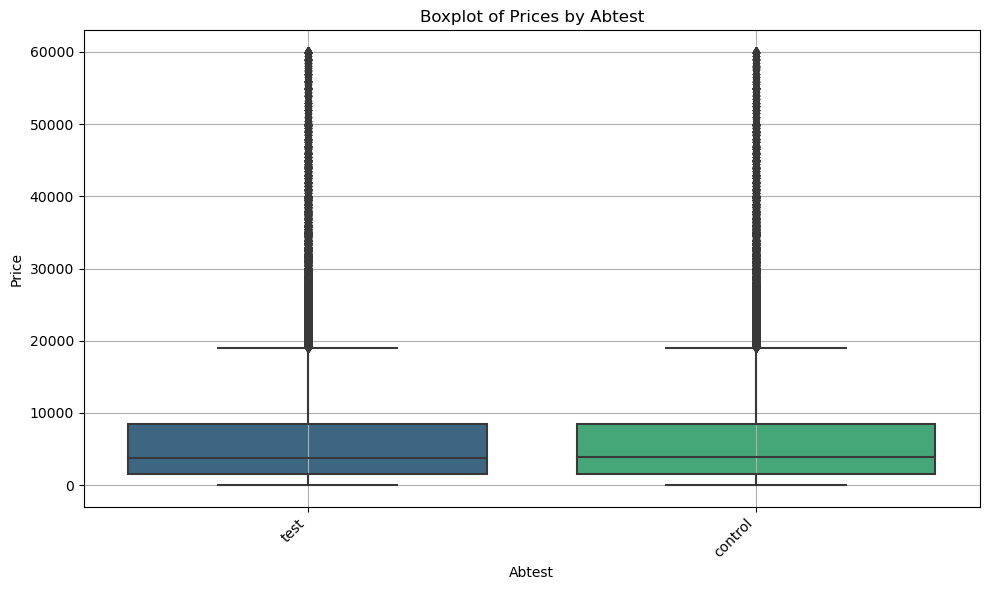

In [127]:
plot_price_boxplot(df3, 'abtest')

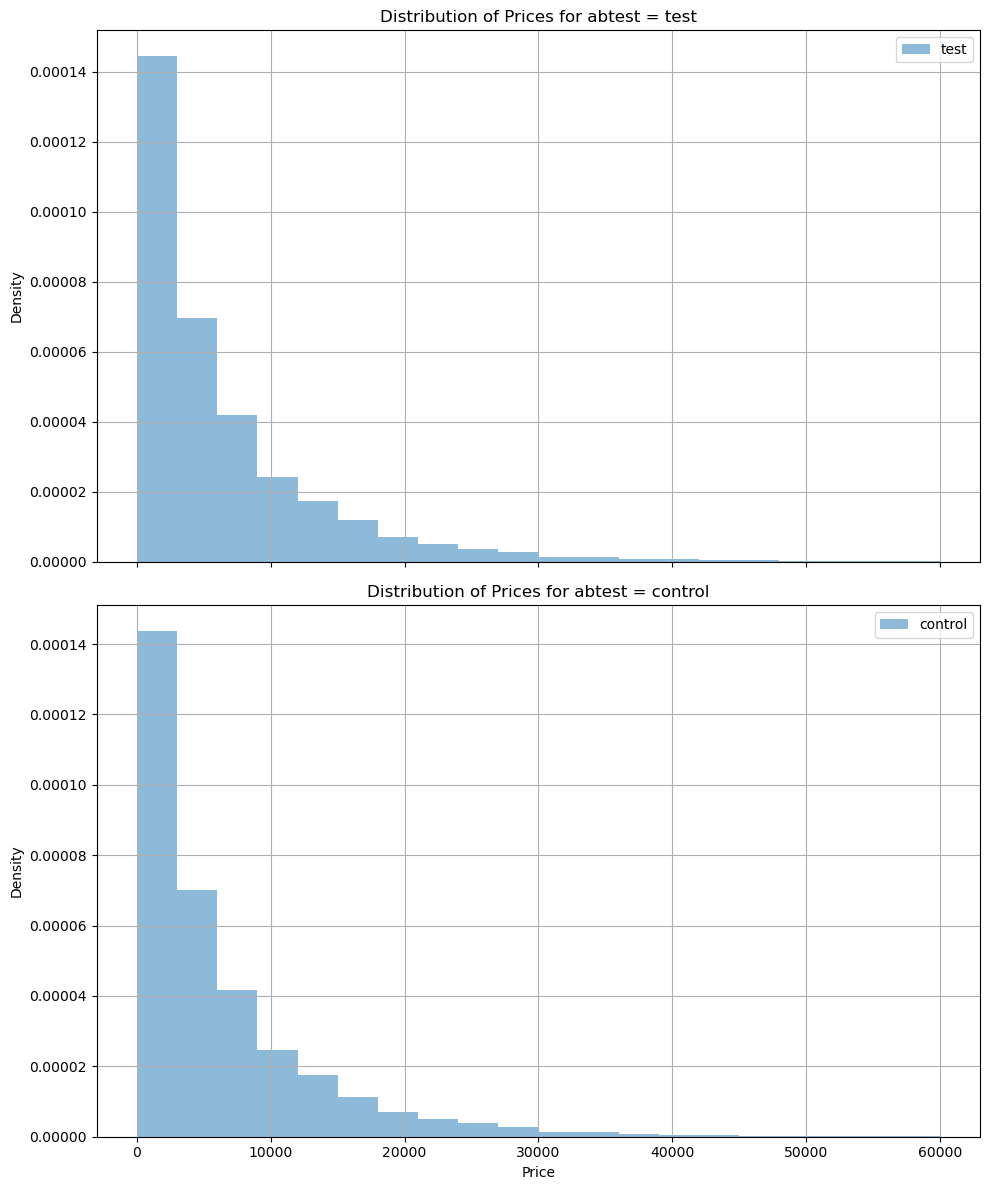

In [128]:
plot_price_distribution_plt(df3,'abtest')

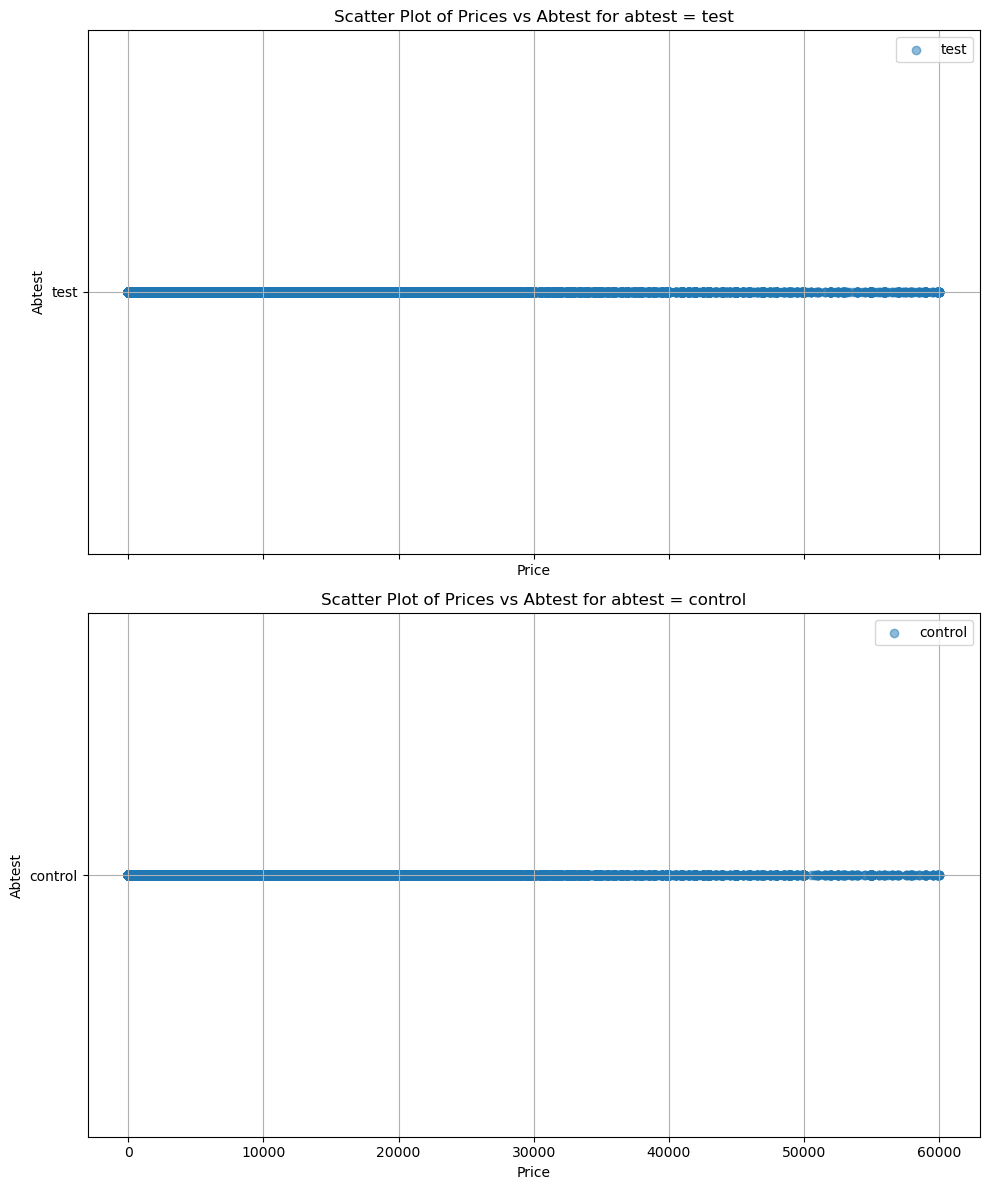

In [136]:
plot_price_distribution_scatter(df3,'abtest')

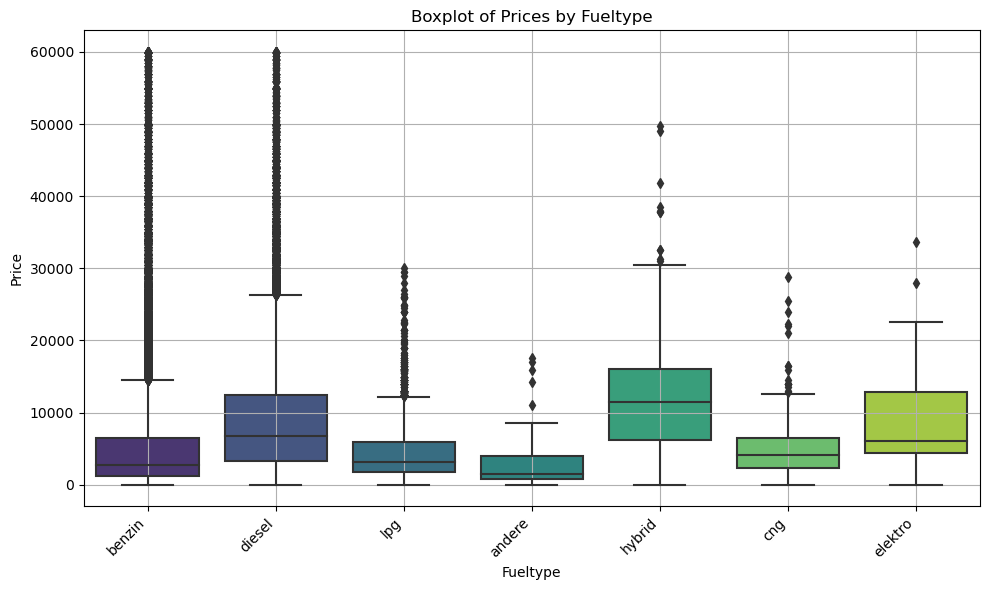

In [129]:
plot_price_boxplot(df3, 'fuelType')

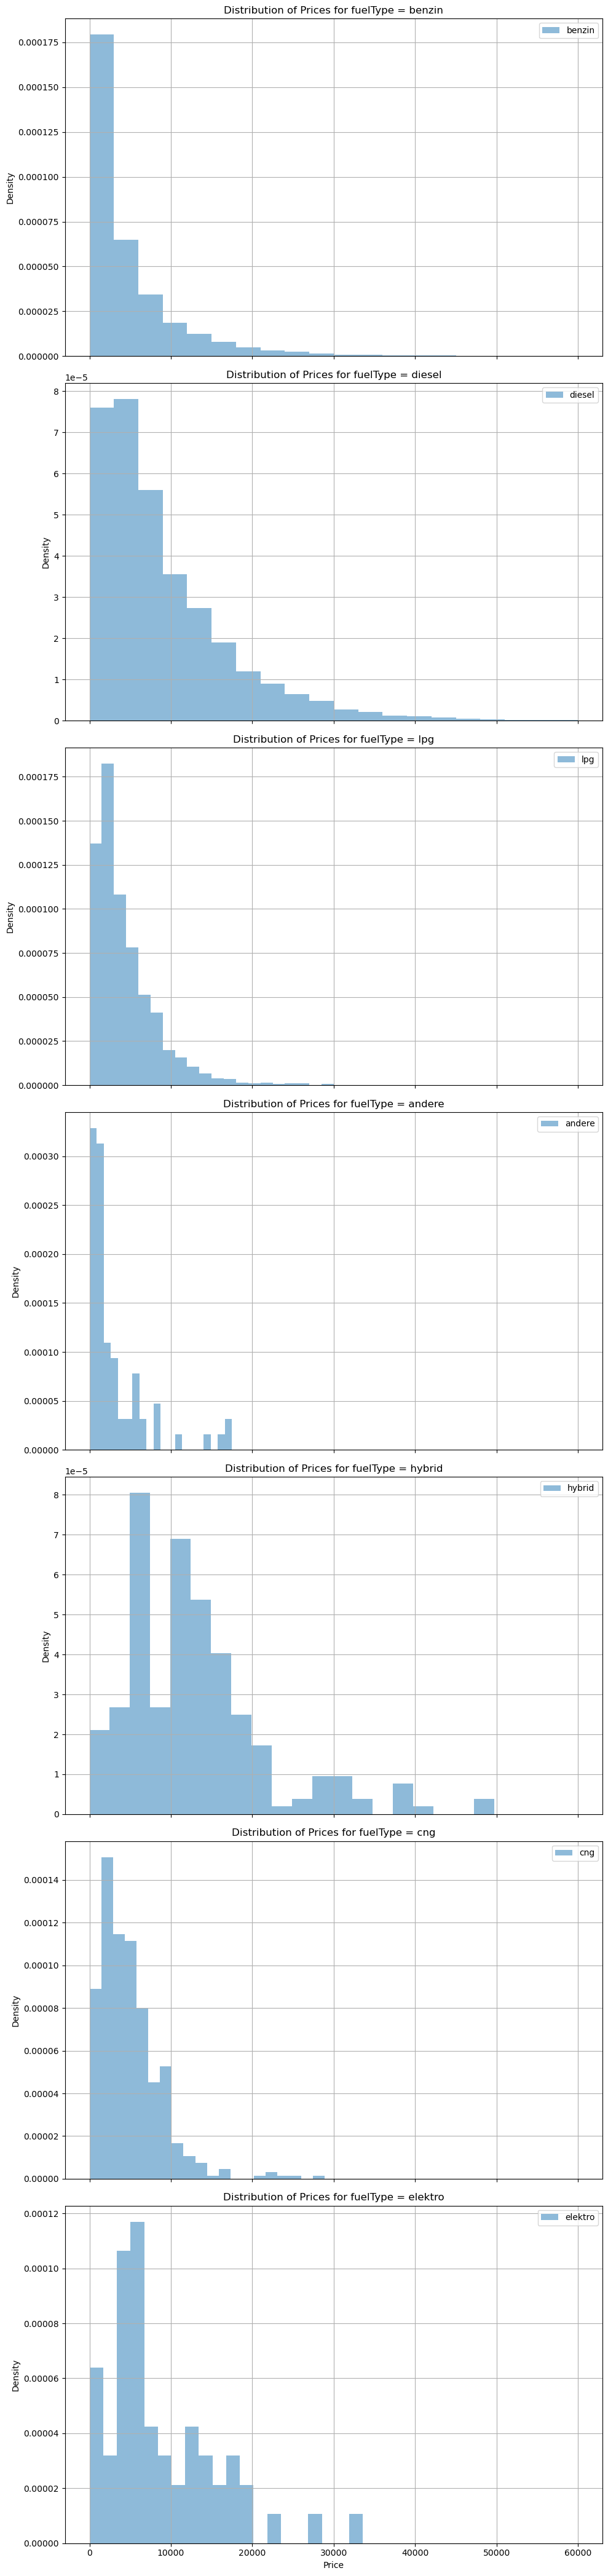

In [122]:
plot_price_distribution_plt(df3,'fuelType')